**Paso 1: Análisis Exploratorio** <br><br>
Distribución de variables:se Observa las distribuciones de Age, Annual Income, y Spending Score para ver patrones o posibles valores atípicos.<br>
Relaciones entre variables:se usan gráficos de dispersión entre pares (pairplot) y agrupa por género para analizar posibles tendencias.

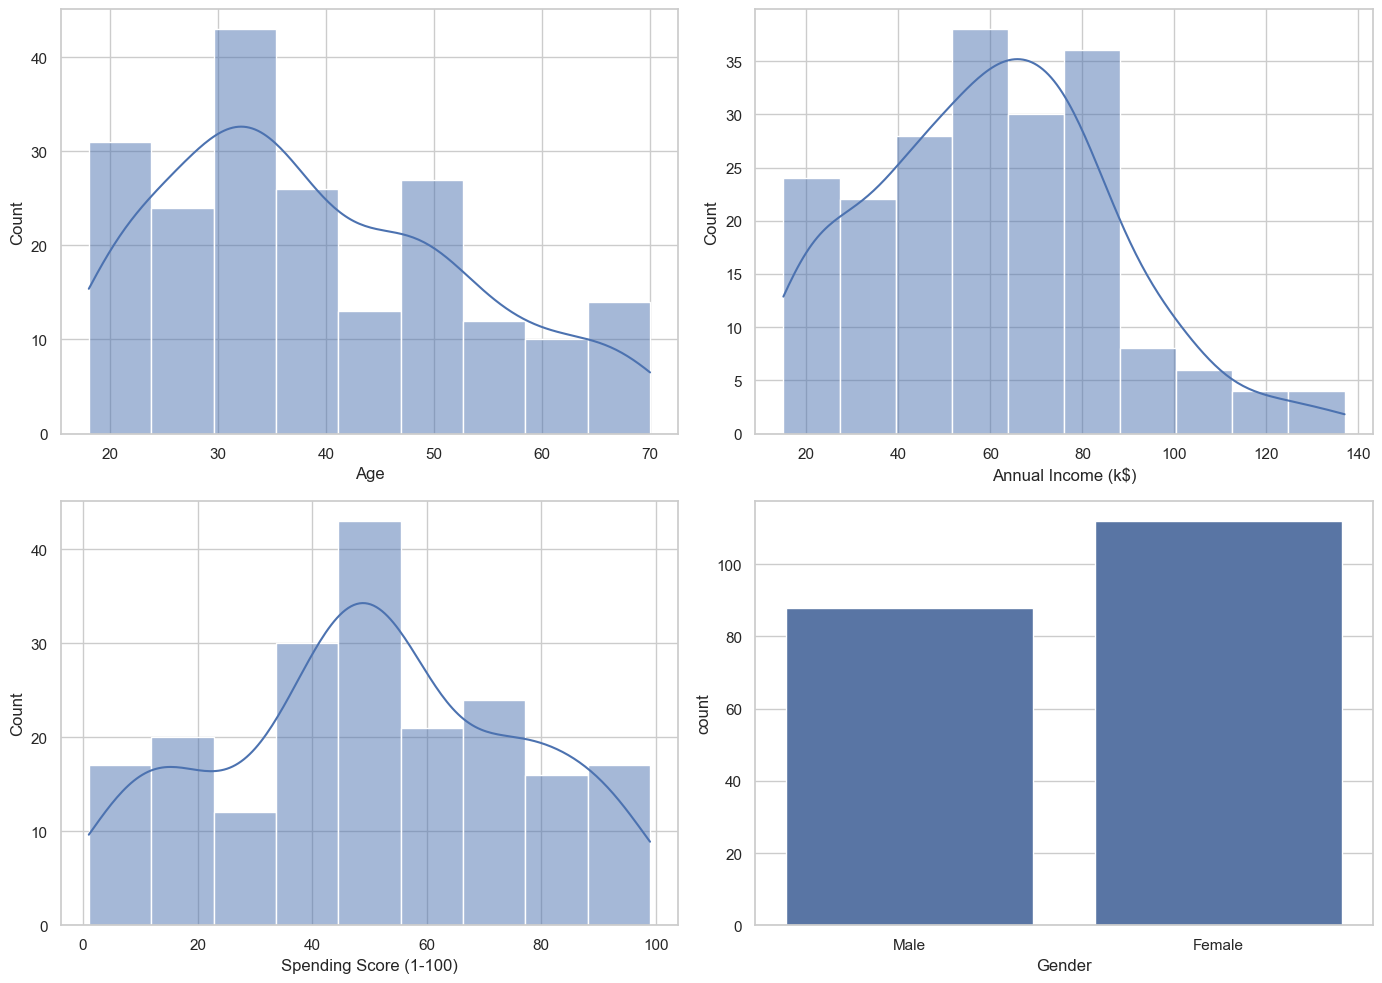

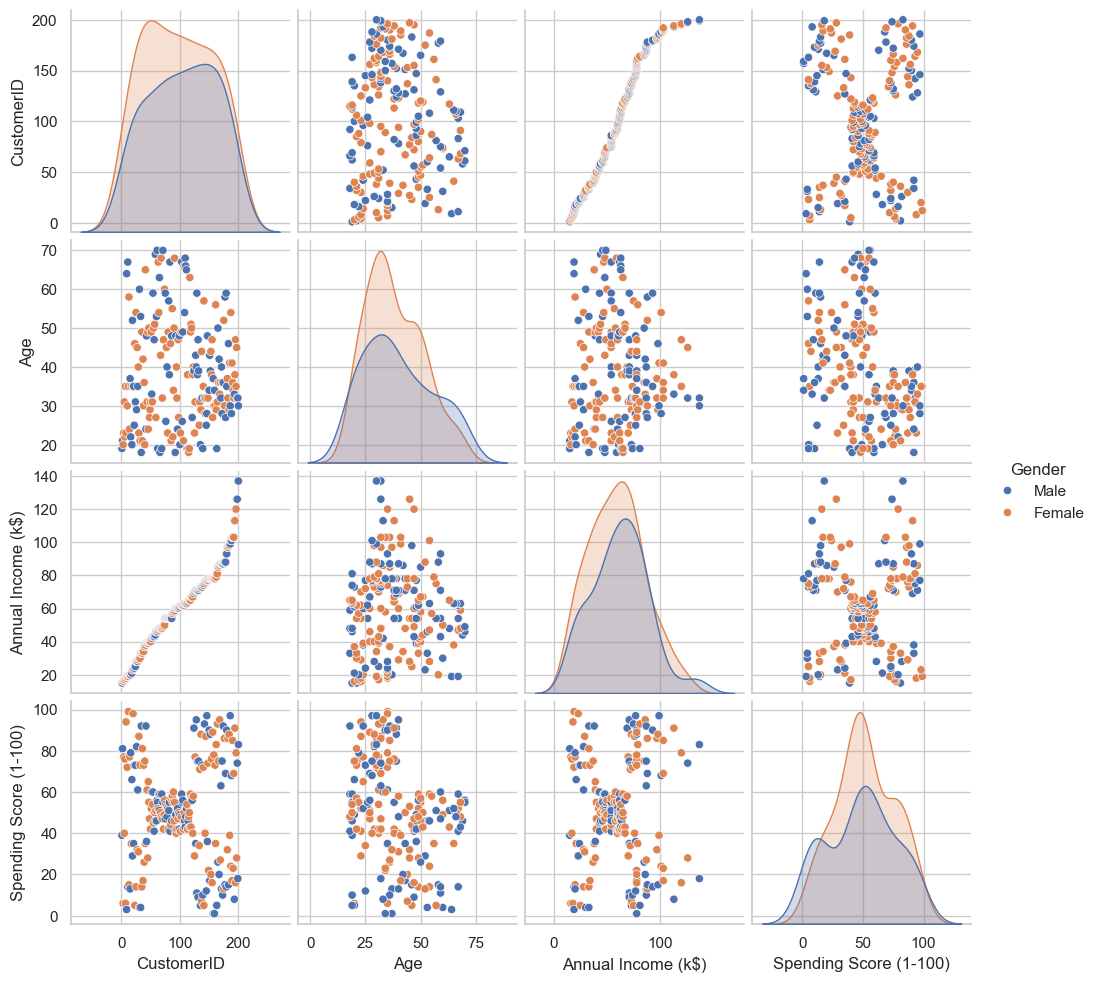

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el archivo
file_path = 'Mall_Customers.csv'  # Asegúrate de que esta ruta sea correcta
data = pd.read_csv(file_path)

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Distribuciones de variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data['Age'], kde=True, ax=axes[0, 0])
sns.histplot(data['Annual Income (k$)'], kde=True, ax=axes[0, 1])
sns.histplot(data['Spending Score (1-100)'], kde=True, ax=axes[1, 0])
sns.countplot(x='Gender', data=data, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Gráficos de relación
sns.pairplot(data, hue="Gender")
plt.show()


**Paso 2: Preprocesamiento de Datos**<br><br>
Codificación de variables categóricas: se convierte Gender en una variable numérica.<br>
Normalización: se normaliza Age, Annual Income, y Spending Score para mejorar la precisión de los algoritmos.

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Codificación de 'Gender'
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Selección de variables numéricas y normalización
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**Paso 3: Selección de Características**<br>
se emplea técnicas como análisis de componentes principales (PCA).<br><br>

**Paso 4: Entrenamiento del Modelo**<br>
K-means: se Configura el número de clusters con KMeans y ajusta el modelo.

In [14]:
from sklearn.cluster import KMeans

# Configuración del modelo K-means
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features)

# Añadir etiquetas de clusters al dataset original
data['Cluster_KMeans'] = kmeans.labels_


C:\Users\cesar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering Jerárquico: Utiliza AgglomerativeClustering.

In [19]:
from sklearn.cluster import AgglomerativeClustering

# Configuración del modelo de clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
data['Cluster_Hierarchical'] = hierarchical.fit_predict(scaled_features)


**Paso 5: Evaluación del Desempeño**<br><br>
se calculan métricas como el Coeficiente de Silhouette y el Índice de Calinski-Harabasz.

In [22]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluación con K-means
silhouette_kmeans = silhouette_score(scaled_features, kmeans.labels_)
calinski_kmeans = calinski_harabasz_score(scaled_features, kmeans.labels_)

# Evaluación con Clustering Jerárquico
silhouette_hierarchical = silhouette_score(scaled_features, hierarchical.labels_)
calinski_hierarchical = calinski_harabasz_score(scaled_features, hierarchical.labels_)

print(f"K-means Silhouette: {silhouette_kmeans}, Calinski-Harabasz: {calinski_kmeans}")
print(f"Hierarchical Clustering Silhouette: {silhouette_hierarchical}, Calinski-Harabasz: {calinski_hierarchical}")


K-means Silhouette: 0.34983789408081173, Calinski-Harabasz: 89.85093371768004
Hierarchical Clustering Silhouette: 0.3614512741691407, Calinski-Harabasz: 102.01939926024943


**Paso 6: Visualización de Resultados**<br>
se visualizan los clusters utilizando gráficos de dispersión.

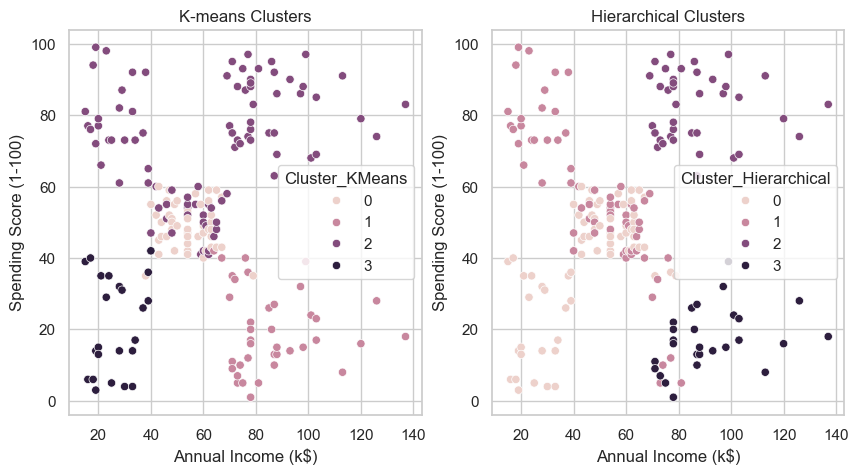

In [25]:
# Gráficos de dispersión para clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', data=data)
plt.title("K-means Clusters")

plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Hierarchical', data=data)
plt.title("Hierarchical Clusters")
plt.show()